In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest,RFE
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Feature Selection

In [3]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
table_rows = data.values
table_rows

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [5]:
x = table_rows[:,0:8] # 1st 8 columns
y = table_rows[:,8] # all columns
x.shape, y.shape

((768, 8), (768,))

### Univarient Selection
- Univariate selection selects relevant features using statistical testing.
- The features having strongest relationship with the prediction variables are selected as the most relevat features
- Program to select four best features from the diabetes.csv data set using the chi-square  statistical test

In [6]:
## We are trying to find K(=4 here) most important features using their chi2 values
## k <= total number of features

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x,y)
np.set_printoptions(precision=2)
print(fit.scores_)

[ 111.52 1411.89   17.61   53.11 2175.57  127.67    5.39  181.3 ]


### Recursive Feature Elemenition(RFE)
- This technique removes the attribures recursively and builds the model with remaining attributes.
- The RFE class of Scikit-learn Python library is used to implement RFE feature selection technique in python

In [7]:
# So the lowest ranked features are to be eleminated
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(x,y)
print(fit.get_feature_names_out())
print(fit.ranking_)
print(fit.support_) # the True ones are eleminated

['x0' 'x1' 'x5' 'x6']
[1 1 3 5 4 1 1 2]
[ True  True False False False  True  True False]


### Principle Component Analysis(PCA)
PCA is the data reduction technique, which selects number of principal components(or features) in the output using linear algebra to tranform the dataset into a compressed form. PCA feature seection technique is implemented with
PCA class of scikit-learn python library.

In [8]:
names = data.columns[:-1]
pca = PCA(n_components=3) # top 3 components to keep
fit = pca.fit(x)
print("Explained variance: %s" %fit.explained_variance_ratio_)
print(pd.DataFrame(fit.components_, columns = names, index=['PC-1', 'PC-2', 'PC-3']))


Explained variance: [0.89 0.06 0.03]
      Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
PC-1    -0.002022  0.097812       0.016093       0.060757  0.993111  0.014011   
PC-2    -0.022649 -0.972210      -0.141909       0.057861  0.094627 -0.046973   
PC-3    -0.022465  0.143429      -0.922467      -0.307013  0.020977 -0.132445   

      DiabetesPedigreeFunction       Age  
PC-1                  0.000537 -0.003565  
PC-2                 -0.000817 -0.140168  
PC-3                 -0.000640 -0.125454  


### Outlier Detection
This technique tries to find out outliers in our dataset. It is very important technique

In [9]:
try:
    df = pd.read_csv("height_weight.csv", header=True,index = False)
except:
    df = pd.read_csv('http://www.billconnelly.net/data/height_weight.csv')
    df.to_csv("height_weight.csv")
df = np.array(df)
df

array([[181.65,  62.04],
       [176.27,  69.56],
       [173.27,  64.7 ],
       ...,
       [164.33,  53.76],
       [171.52,  60.12],
       [174.95,  56.76]])

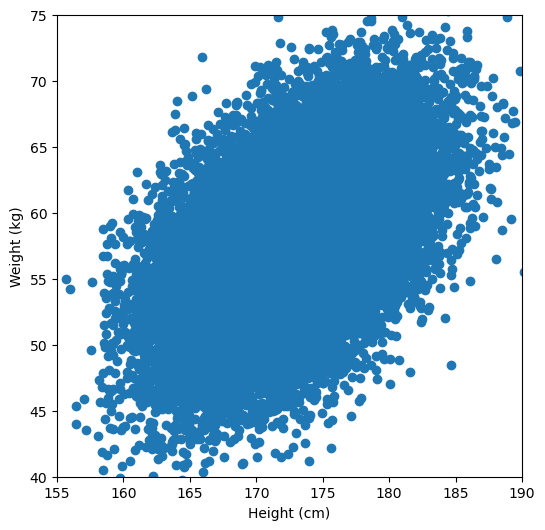

In [10]:
#Plot the data
fig = plt.figure(figsize=(6,6))
plt.scatter(df[:,0], df[:,1])
ax = plt.gca()
# Plot the results
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.xlim((155,190))
plt.ylim((40,75))
plt.show()

In [11]:
#Perform the PCA
pca = PCA(n_components=2)
pcafit = pca.fit(df)